Exploratory Data Analysis (EDA)

---

Introduction

The journey of any data-driven project begins with a thorough Exploratory Data Analysis (EDA). EDA is the compass that guides us, revealing patterns, anomalies, and relationships that are otherwise hidden within the raw data. In this project, EDA is particularly crucial as it provides the foundation for understanding the logistical complexities embedded in our dataset.

In this stage, we will delve into univariate and bivariate analyses, inspecting individual features such as Distance Traveled, Fuel Costs, and Driver Ratings to understand their distributions and potential outliers. We will also examine correlations between key variables and visualize their relationships. A special focus will be given to clustering techniques like K-Means, DBSCAN, and hierarchical clustering, which help identify natural groupings within the data. The goal here is to uncover hidden patterns that may impact cost and efficiency, such as route types, traffic conditions, and driver experience.

---

Conclusion

Upon completion of the EDA, we achieved a comprehensive understanding of the data's structure and relationships. Univariate analyses revealed the underlying distribution of critical features, providing insights into factors such as the average distance traveled and typical fuel costs. Bivariate and multivariate analyses further uncovered intricate relationships, particularly between Driver Consistency and Customer Satisfaction, highlighting areas where efficiency and satisfaction intersect. Our clustering analyses suggested potential driver and route segments, paving the way for targeted optimizations in later stages. Armed with these insights, we are ready to move forward with feature engineering, where we'll transform these raw insights into meaningful predictors.

In [121]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sys
import os

# Ensure 'scripts' is in the same parent directory as 'notebooks'
sys.path.append(os.path.abspath("../scripts"))
logistics_df = pd.read_csv('../data/raw/logistics_df.csv')

In [122]:
from utils import plot_numeric_correlation_heatmap, load_cleaned_data, save_data, save_model, plot_distribution, plot_correlation_heatmap, check_missing_values, ensure_dir
from modeling import train_model, evaluate_model
from sklearn.model_selection import train_test_split

In [123]:
# Display basic info and initial rows
logistics_df.info()
logistics_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Route ID                       10000 non-null  object 
 1   Driver ID                      10000 non-null  object 
 2   Delivery Time (hours)          10000 non-null  float64
 3   Date                           10000 non-null  object 
 4   Fuel Costs (USD)               10000 non-null  float64
 5   Delivery Start Time            10000 non-null  object 
 6   Distance Traveled (miles)      10000 non-null  float64
 7   Estimated Distance (miles)     10000 non-null  float64
 8   Weather Conditions             10000 non-null  object 
 9   Traffic Conditions             10000 non-null  object 
 10  Driver Ratings                 10000 non-null  float64
 11  Customer Satisfaction          10000 non-null  object 
 12  Delays (hours)                 10000 non-null  

Route ID                             Driver ID  \
0  3a2d8f81-6054-45fa-b13a-24cd540ee76d  75149212-0e83-4e5b-83d4-3bd0c53f3030   
1  e8e92a39-62e1-4743-baee-c8544fbe59ee  9f47ca00-1ae7-4f76-878a-9a283d2c2ec2   
2  f6b4a887-f0cc-4528-a178-583c6c4d1fc4  fc05b7ca-0b9f-427d-9874-e21be1c6e521   
3  257e5a3f-78d3-48a1-8584-f508f2ee3670  4dd64322-0cc6-44a8-a2b7-b5f2663c9cae   
4  c74ae987-3974-490b-9707-bb325937916f  4ad93d48-9ad6-46a7-933c-57f8603a7f03   

   Delivery Time (hours)        Date  Fuel Costs (USD) Delivery Start Time  \
0               6.880603  2023-02-09        225.206331            22:34:14   
1               4.967601  2023-06-17        570.840791            03:38:06   
2               8.094009  2023-12-18        447.387571            09:01:13   
3               7.297488  2023-04-22        886.741516            14:26:53   
4               7.797437  2023-07-07        871.855361            03:17:26   

   Distance Traveled (miles)  Estimated Distance (miles) Weather Conditions  \
0                 571.318744                 2339.271800              Clear   
1                1593.917947                 1468.769307         Heavy Rain   
2                1127.075475                 2270.634894              Clear   
3                1607.293364                 2476.720021         Heavy Rain   
4                 379.177698                  965.593024         Heavy Rain   

  Traffic Conditions  ...  Cost per Gallon (USD) Total Fuel Cost (USD)  \
0           Moderate  ...                    3.0            305.072583   
1              Heavy  ...                    3.5            992.973038   
2             Severe  ...                    3.0            601.835368   
3              Light  ...                    3.0            858.261948   
4              Light  ...                    3.5            236.218704   

   Insurance Costs (USD)  Breakdown Repair Costs (USD)  \
0              53.293350                           0.0   
1              60.448295                           0.0   
2              36.241719                           0.0   
3              75.561809                           0.0   
4              26.602416                           0.0   

   Overtime Labor Costs (USD) Fuel Surcharge (USD)  Idle Cost (USD)  \
0                    0.000000            15.806772         0.368712   
1                    0.000000            40.066147         1.623336   
2                    2.384313            31.401218         0.855647   
3                    0.000000            62.238573         0.330756   
4                    0.000000            61.193744         2.769288   

  Total Operational Cost (USD) Fuel Cost per Mile Delivery Efficiency Score  
0                   340.228658           0.394187                  0.015323  
1                   684.194856           0.358137                  0.047800  
2                   559.776989           0.396946                  0.007551  
3                  1052.419293           0.551699                  0.008019  
4                  1008.848800           2.299332                  0.013692  

[5 rows x 38 columns]

In [124]:
# Display summary statistics for numerical features
logistics_df.describe()

Delivery Time (hours)  Fuel Costs (USD)  Distance Traveled (miles)  \
count           10000.000000      10000.000000               10000.000000   
mean                5.487640        525.460808                1521.820095   
std                 2.607309        274.907098                 855.887588   
min                 1.000608         50.465151                  50.033944   
25%                 3.222768        289.576378                 770.372576   
50%                 5.488713        527.002416                1523.007078   
75%                 7.747664        763.830380                2266.245160   
max                 9.999172        999.874174                2999.809999   

       Estimated Distance (miles)  Driver Ratings  Delays (hours)  \
count                10000.000000    10000.000000    10000.000000   
mean                  1517.120040        3.016225        2.503652   
std                    846.318771        1.159170        1.435720   
min                     51.110217        1.000193        0.000101   
25%                    783.670954        2.011505        1.273559   
50%                   1513.848913        3.041141        2.489422   
75%                   2247.017822        4.014080        3.734776   
max                   2999.921224        4.999893        4.999937   

       Warehouse Storage Costs (USD)  Truck Maintenance Costs (USD)  \
count                   10000.000000                   10000.000000   
mean                      300.530400                    1245.194784   
std                       115.852533                     433.589817   
min                       100.013908                     500.137070   
25%                       200.584474                     868.822292   
50%                       299.398719                    1243.562013   
75%                       401.331333                    1622.150104   
max                       499.842141                    1999.979952   

       Load Weight (tons)  Truck Condition  ...  Cost per Gallon (USD)  \
count        10000.000000     10000.000000  ...           10000.000000   
mean            10.232759         2.993300  ...               3.246450   
std              5.637719         1.405508  ...               0.249987   
min              0.500824         1.000000  ...               3.000000   
25%              5.309809         2.000000  ...               3.000000   
50%             10.218333         3.000000  ...               3.000000   
75%             15.164938         4.000000  ...               3.500000   
max             19.995380         5.000000  ...               3.500000   

       Total Fuel Cost (USD)  Insurance Costs (USD)  \
count           10000.000000           10000.000000   
mean              879.376796              59.819246   
std               500.609097              23.041891   
min                26.748160              20.021269   
25%               443.139213              39.977996   
50%               871.880708              59.534881   
75%              1301.548425              79.669439   
max              1868.810408              99.972024   

       Breakdown Repair Costs (USD)  Overtime Labor Costs (USD)  \
count                  10000.000000                10000.000000   
mean                     241.268405                    5.646224   
std                      329.944055                   12.557933   
min                        0.000000                    0.000000   
25%                        0.000000                    0.000000   
50%                        0.000000                    0.000000   
75%                      497.964480                    0.000000   
max                      999.776252                   50.704356   

       Fuel Surcharge (USD)  Idle Cost (USD)  Total Operational Cost (USD)  \
count          10000.000000     10000.000000                  10000.000000   
mean              36.881019         1.641095                    910.519736   
std               19.295167         0.944924      

In [125]:
df = logistics_df

In [126]:
# Check for missing values
missing_values = logistics_df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

<Figure size 1000x600 with 0 Axes>

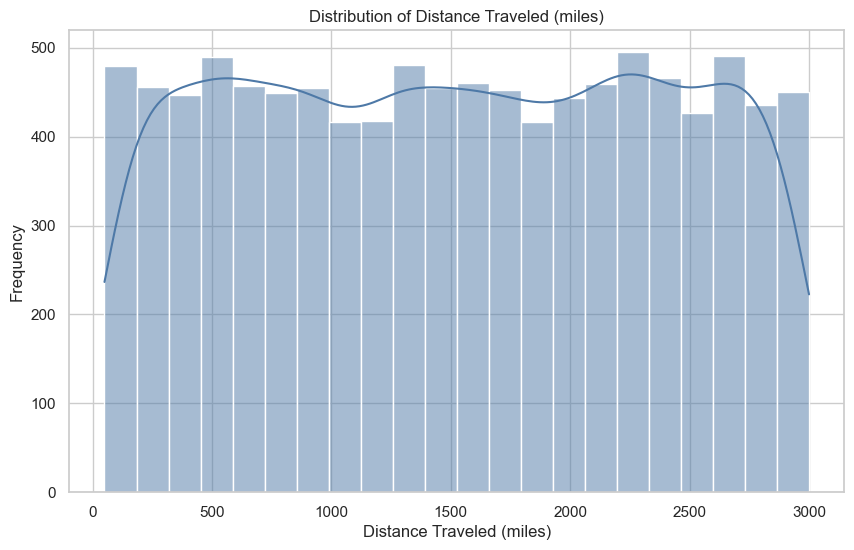

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 6))

# Univariate Analysis: Histogram
def plot_histogram(column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, color="#4e79a7")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

plot_histogram('Distance Traveled (miles)')

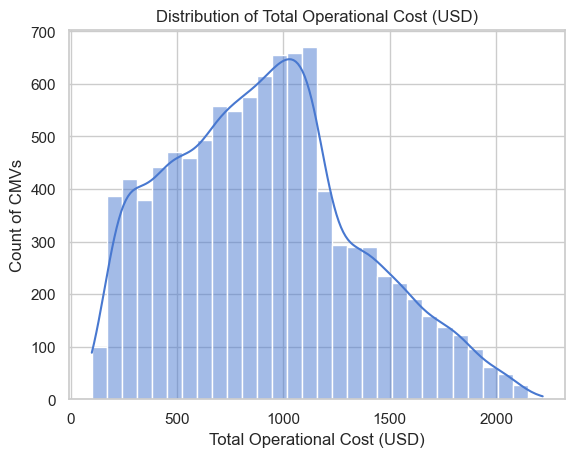

In [128]:
# Plot distribution of Total Operational Cost
sns.histplot(logistics_df['Total Operational Cost (USD)'], bins=30, kde=True)
plt.title("Distribution of Total Operational Cost (USD)")
plt.ylabel("Count of CMVs")
plt.savefig("../results/figures/distance_traveled_histogram.png", dpi=300, bbox_inches="tight")
plt.show()

Histogram

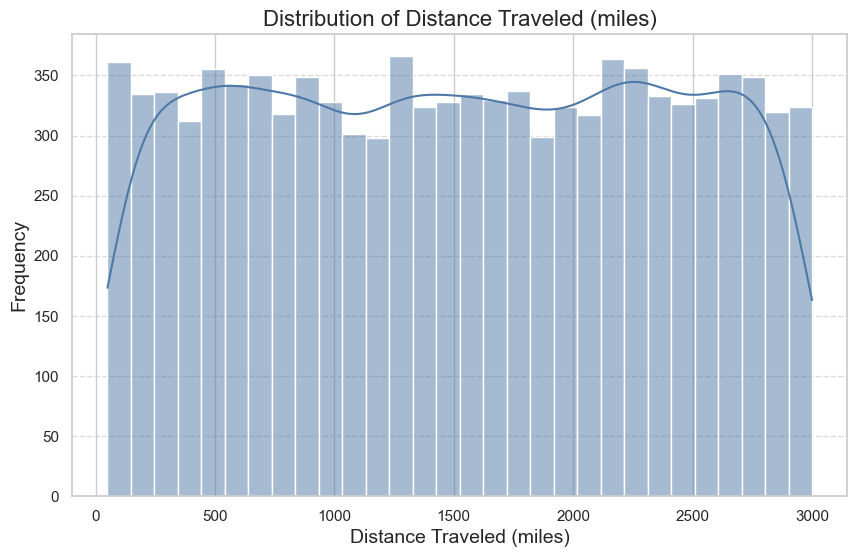

In [129]:
# Basic univariate visualization.

plt.figure(figsize=(10, 6))
sns.histplot(df['Distance Traveled (miles)'], bins=30, kde=True, color="#4e79a7")
plt.title("Distribution of Distance Traveled (miles)", fontsize=16)
plt.xlabel("Distance Traveled (miles)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Box Plot

Purpose: Identifies the distribution and outliers of a variable.

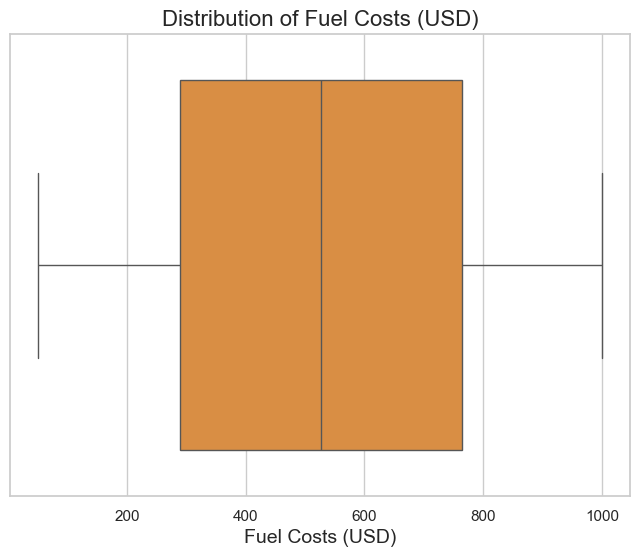

In [130]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fuel Costs (USD)'], color="#f28e2b")
plt.title("Distribution of Fuel Costs (USD)", fontsize=16)
plt.xlabel("Fuel Costs (USD)", fontsize=14)
plt.show()

KDE Plot

Purpose: Shows the probability density of a continuous variable.


/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_66967/4209739614.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Delivery Time (hours)'], shade=True, color="#76b7b2")


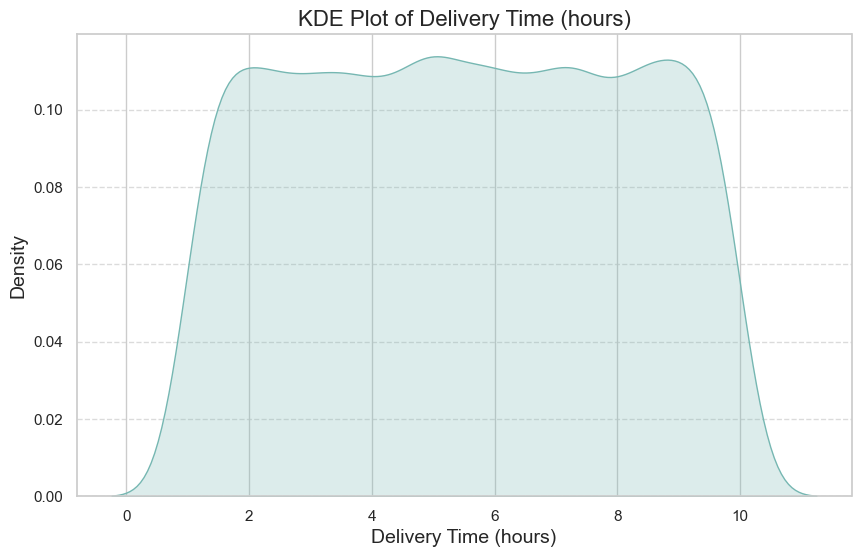

In [131]:

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Delivery Time (hours)'], shade=True, color="#76b7b2")
plt.title("KDE Plot of Delivery Time (hours)", fontsize=16)
plt.xlabel("Delivery Time (hours)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bar Chart

Purpose: Useful for categorical data to show frequency counts.

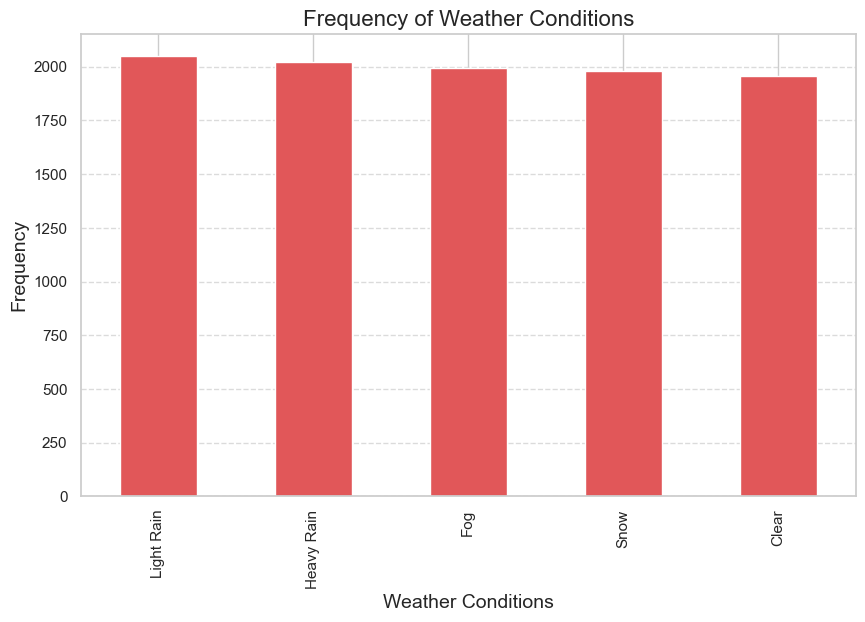

In [132]:

plt.figure(figsize=(10, 6))
df['Weather Conditions'].value_counts().plot(kind='bar', color="#e15759")
plt.title("Frequency of Weather Conditions", fontsize=16)
plt.xlabel("Weather Conditions", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---

## Bivariate & Multivariate Visualizations (Examining Relationships)

---

Scatter Plot

Purpose: Shows the relationship between two continuous variables.

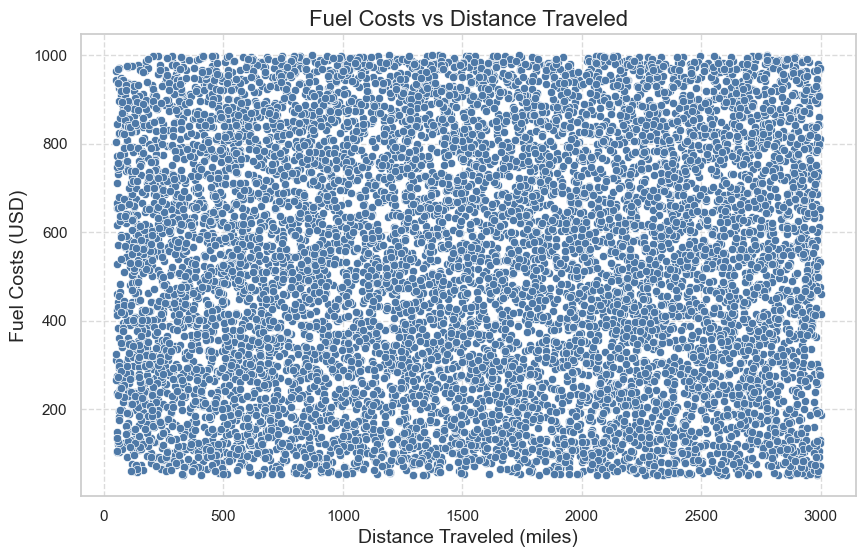

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance Traveled (miles)', y='Fuel Costs (USD)', data=df, color="#4e79a7")
plt.title("Fuel Costs vs Distance Traveled", fontsize=16)
plt.xlabel("Distance Traveled (miles)", fontsize=14)
plt.ylabel("Fuel Costs (USD)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Pair Plot

Purpose: Matrix of scatter plots to examine relationships between multiple variables.

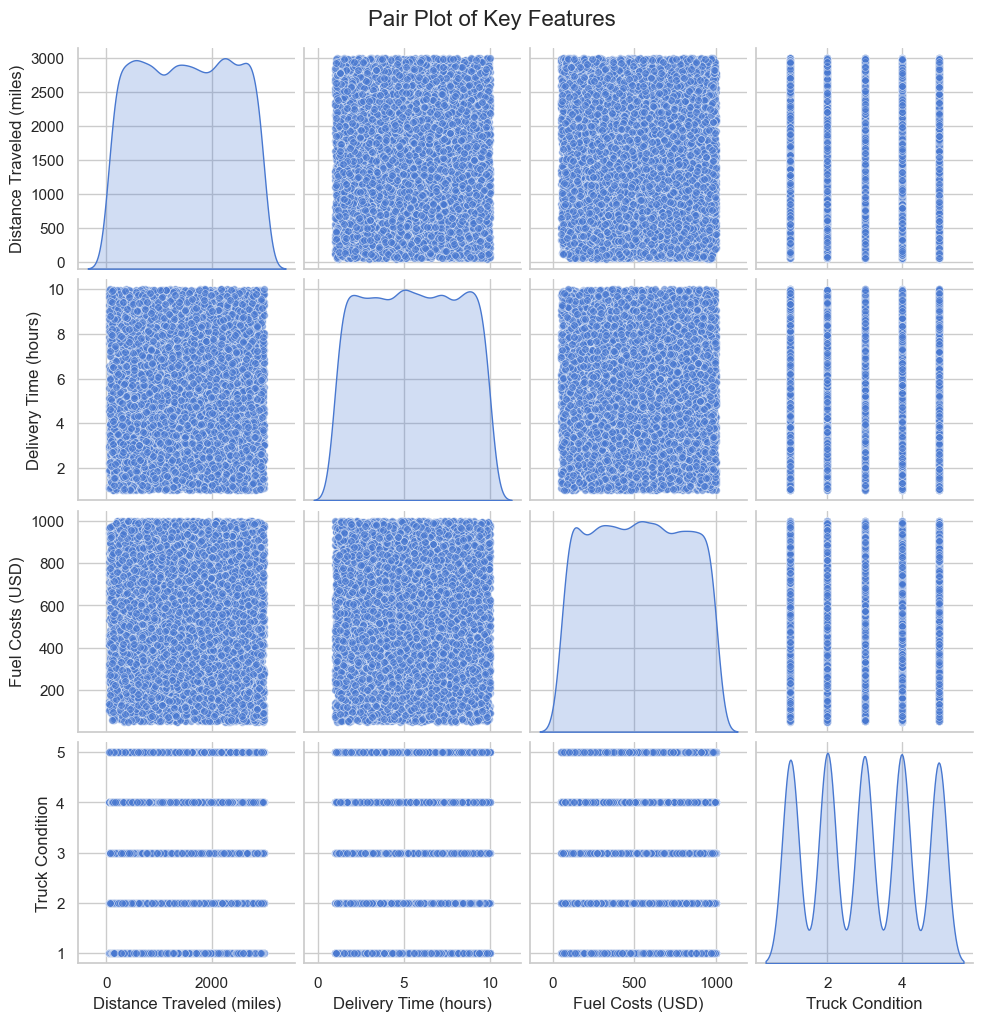

In [134]:

sns.pairplot(df[['Distance Traveled (miles)', 'Delivery Time (hours)', 'Fuel Costs (USD)', 'Truck Condition']], 
             diag_kind='kde', plot_kws={'alpha':0.6, 's':30}, height=2.5)
plt.suptitle("Pair Plot of Key Features", y=1.02, fontsize=16)
plt.show()

In [135]:
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

# Copy DataFrame to work with encoding
encoded_df = logistics_df.copy()

# Drop columns that don't contribute to correlation analysis
encoded_df = logistics_df.drop(columns=['Route ID', 'Driver ID', 'Date', 'Delivery Start Time'], errors='ignore')

# Ordinal Encoding for ordered categories
ordinal_encoder = OrdinalEncoder(categories=[['Junior', 'Intermediate', 'Senior']])
encoded_df['Driver Experience'] = ordinal_encoder.fit_transform(encoded_df[['Driver Experience']])

# One-Hot Encoding for nominal categories
encoded_df = pd.get_dummies(encoded_df, columns=['Traffic Conditions', 'Weather Conditions', 
                                                 'Route Type', 'Truck Type', 'Load Type', 
                                                 'Delivery Window', 'Customer Satisfaction',
                                                 'Fuel Type'], 
                            drop_first=True)  # Drop first level to avoid multicollinearity


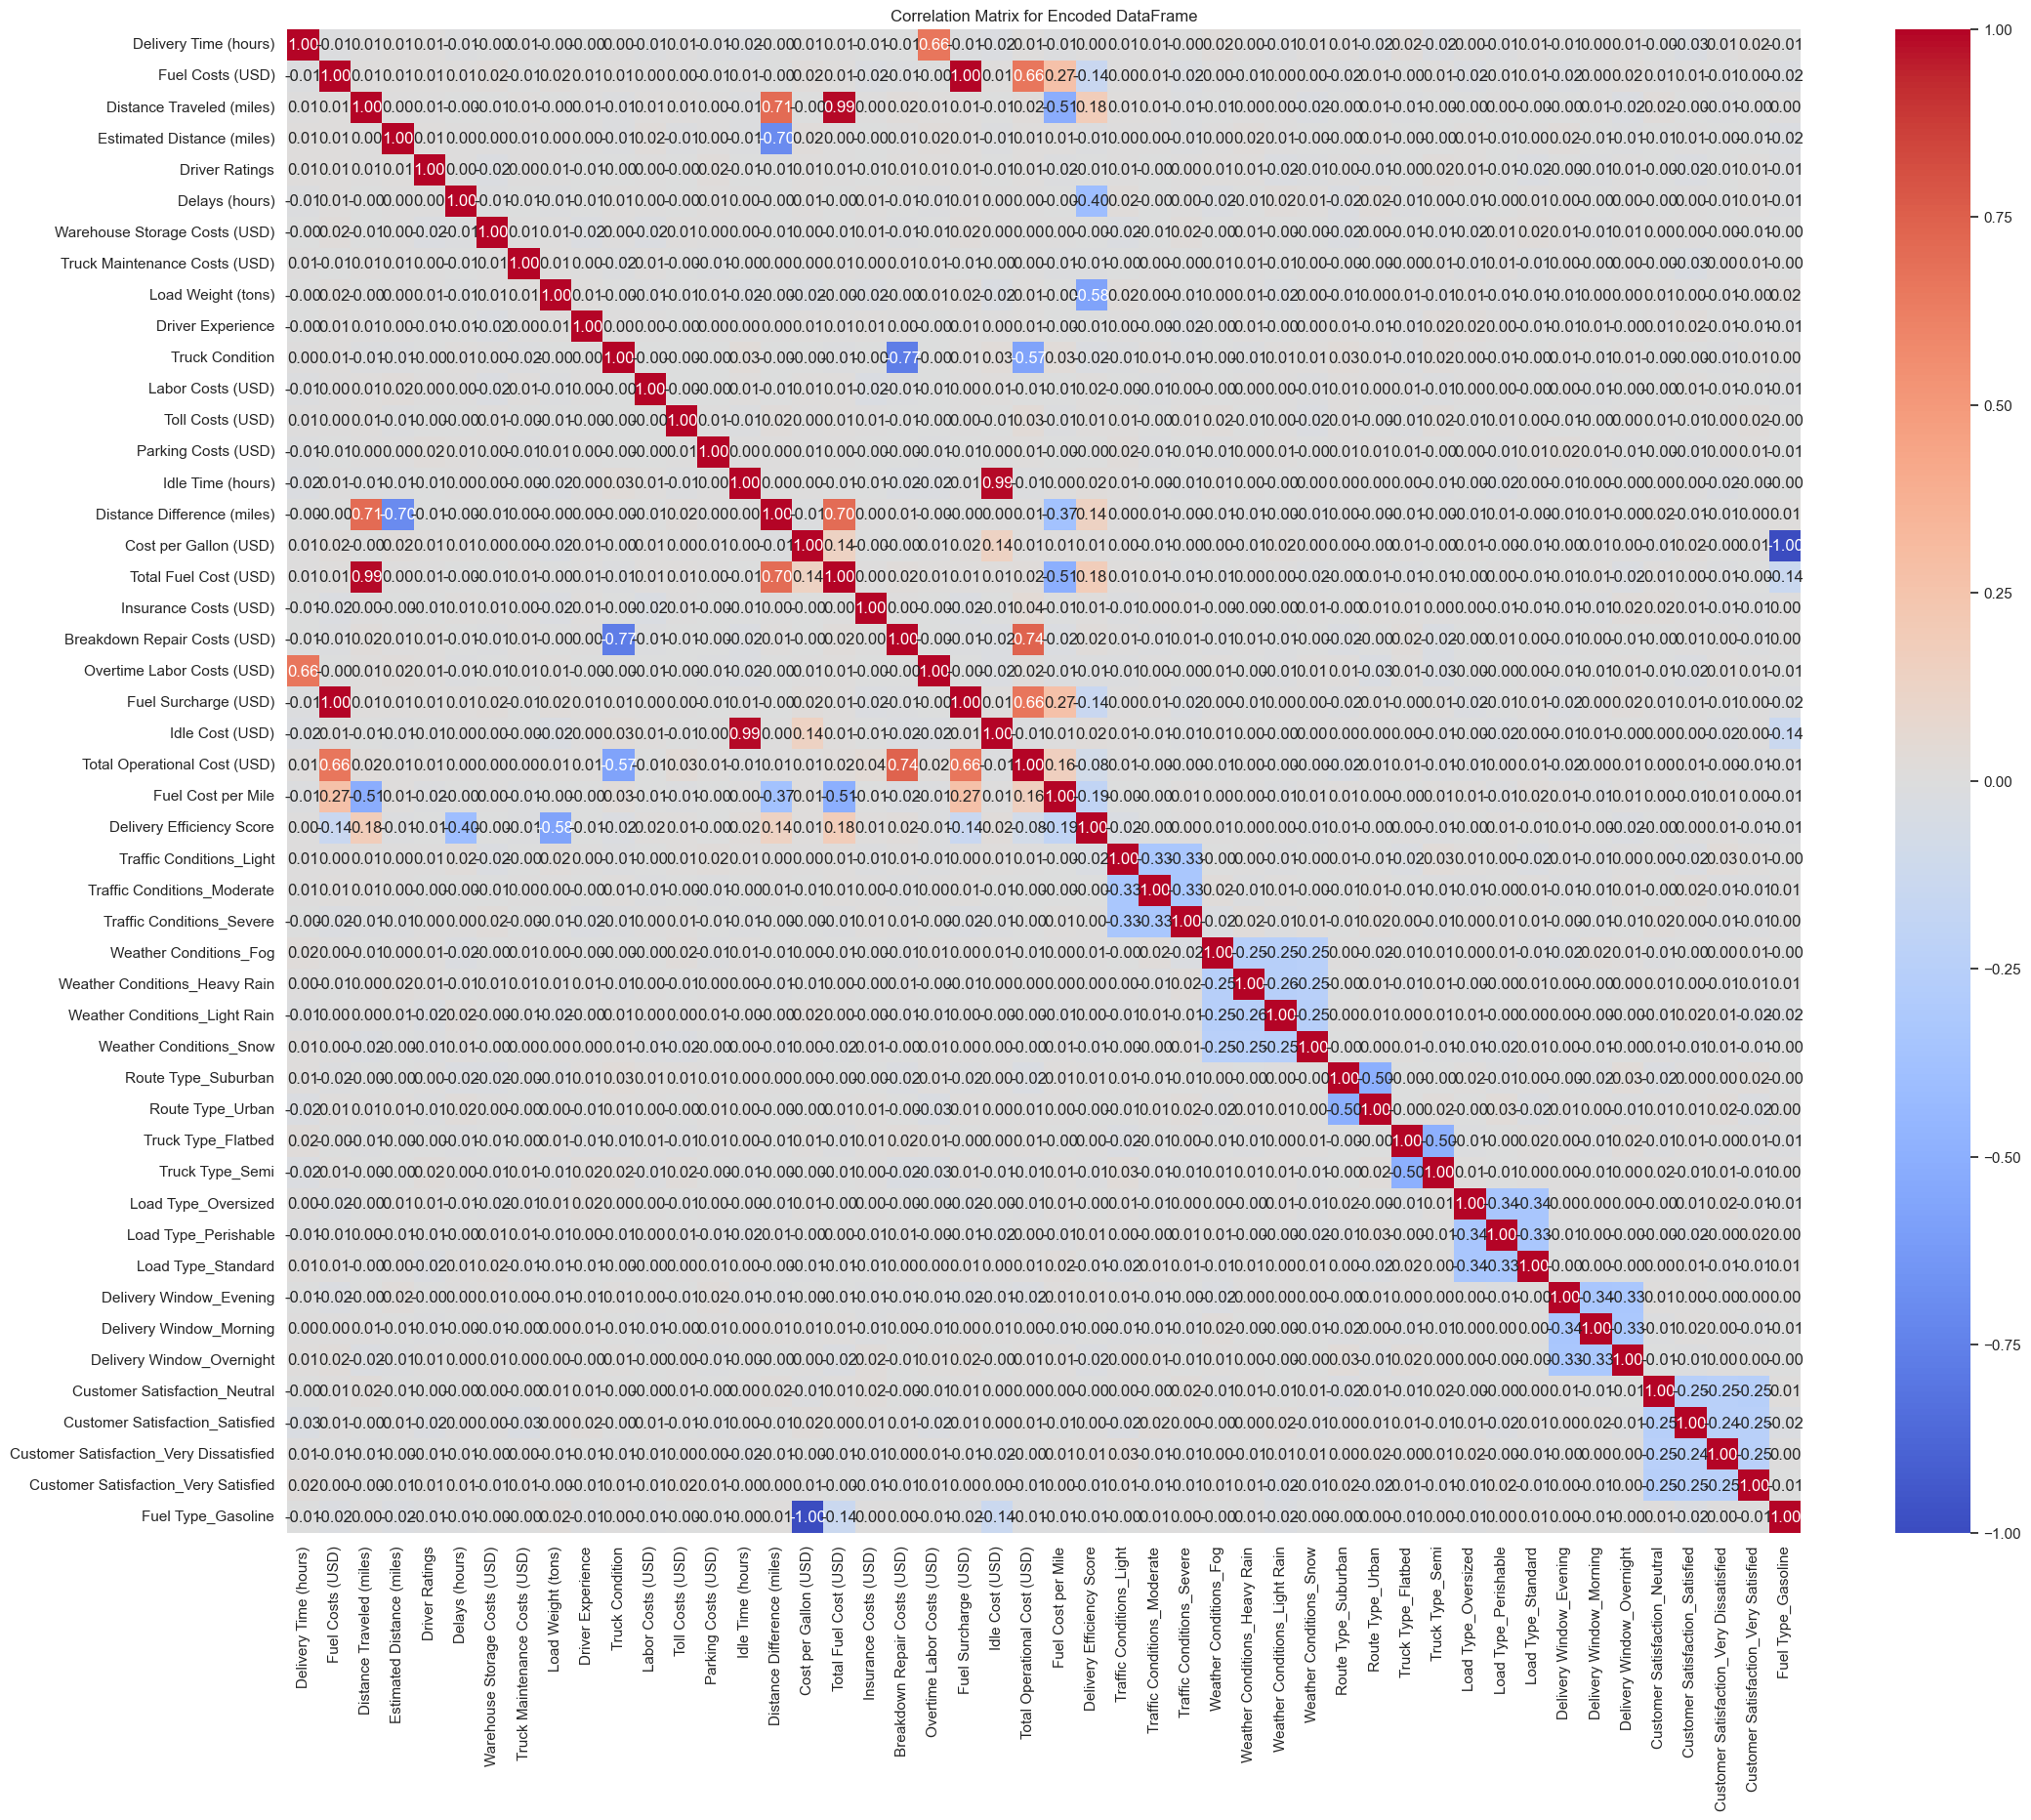

In [136]:
# Calculate the correlation matrix
corr_matrix = encoded_df.corr()

# Plot the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Encoded DataFrame")
plt.show()


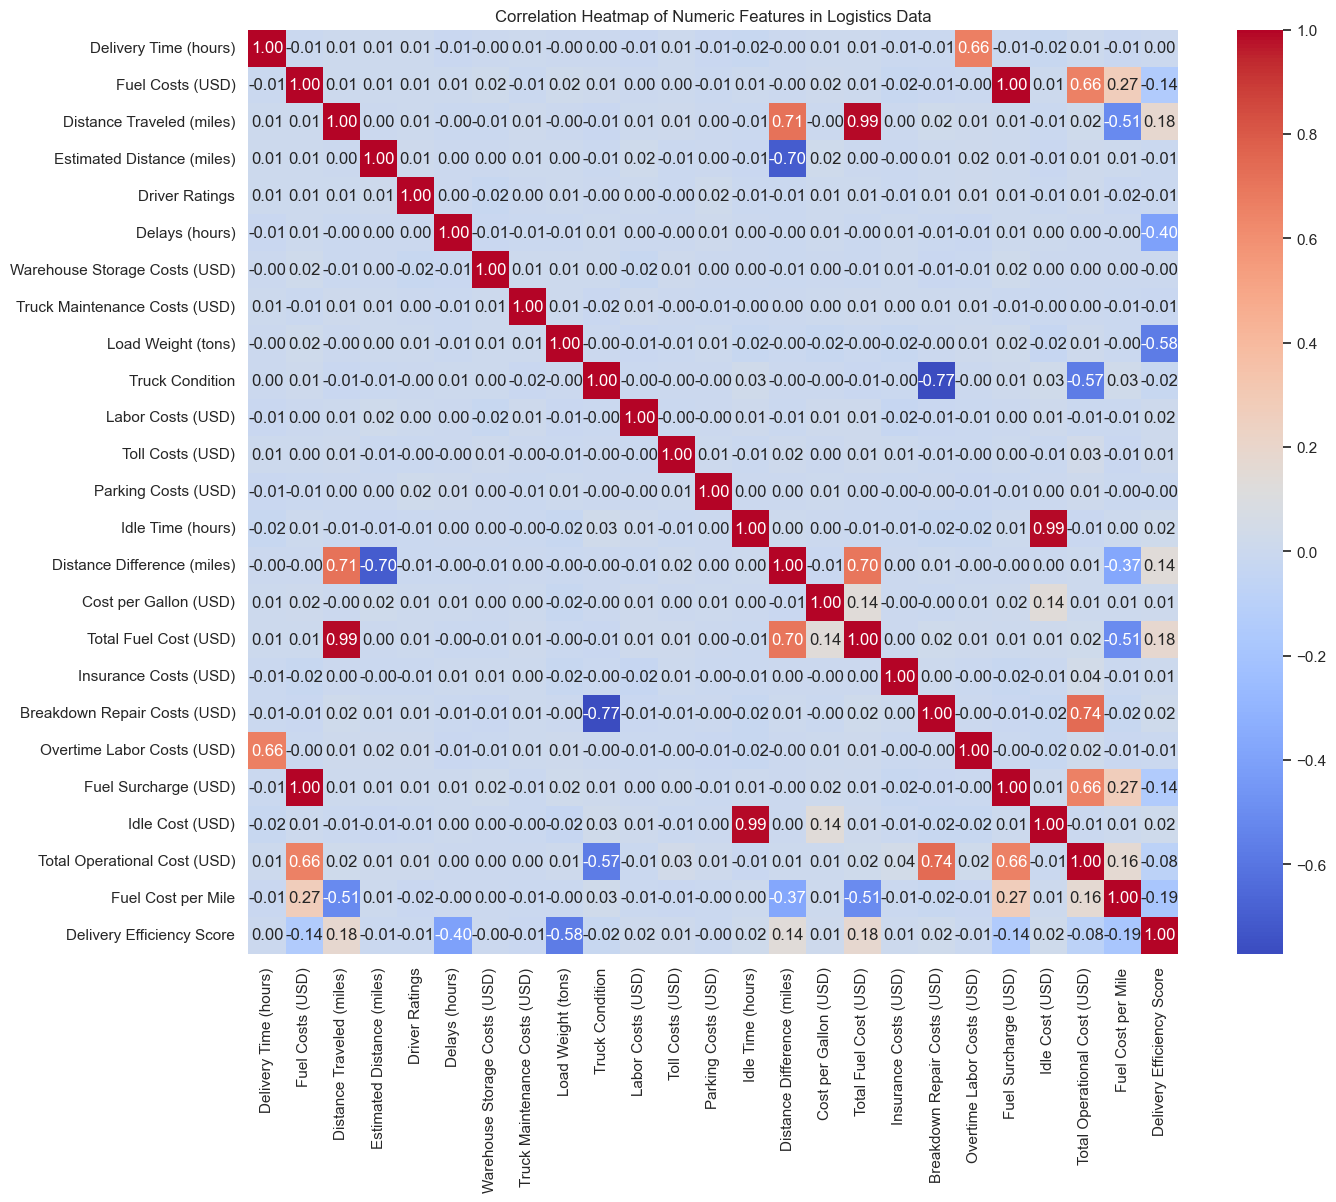

In [137]:
# Filter for numeric columns only
numeric_df = logistics_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix on numeric data
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features in Logistics Data")
plt.show()

Box Plot by Group

Purpose: Shows the distribution of a variable grouped by a categorical variable.


/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_66967/1509406610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic Conditions', y='Delivery Time (hours)', data=df, palette="Set2")


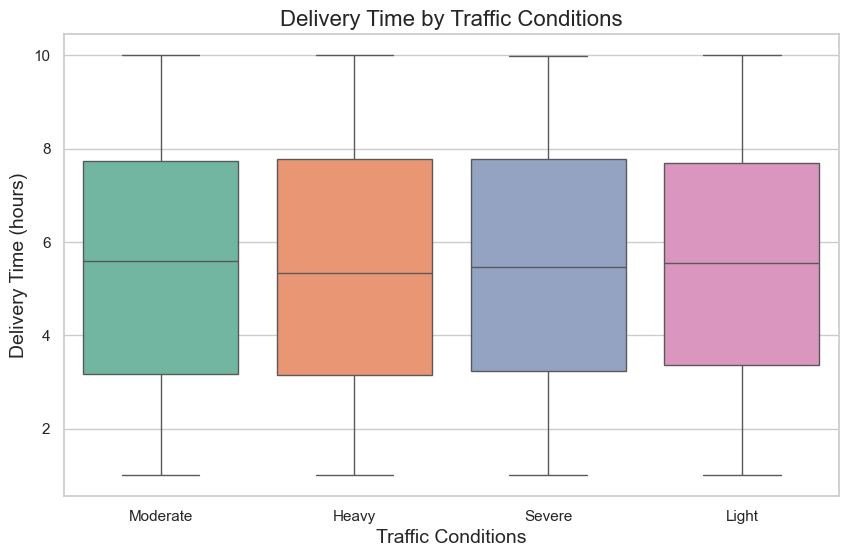

In [138]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic Conditions', y='Delivery Time (hours)', data=df, palette="Set2")
plt.title("Delivery Time by Traffic Conditions", fontsize=16)
plt.xlabel("Traffic Conditions", fontsize=14)
plt.ylabel("Delivery Time (hours)", fontsize=14)
plt.show()

EDA Part 2: Categorical Analysis and Visualizations

Count Plots for Categorical Variables:

For variables like Route Type, Truck Type, and Driver Experience,  count plots to show the distribution across categories.

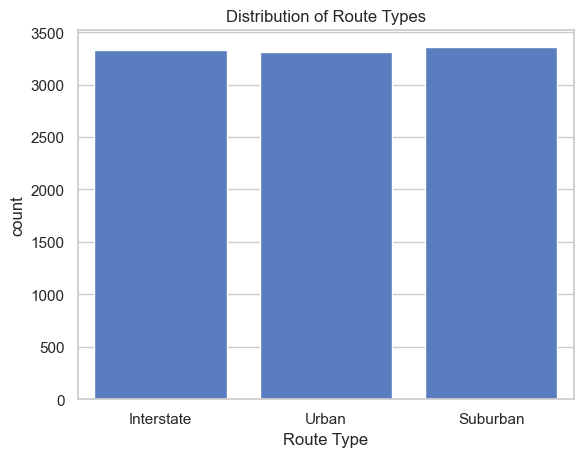

In [139]:
# Count plot for Route Type
sns.countplot(data=logistics_df, x='Route Type')
plt.title("Distribution of Route Types")
plt.show()

This line plot will show trends over time, helping identify any patterns in costs by traffic condition and allowing for better planning.

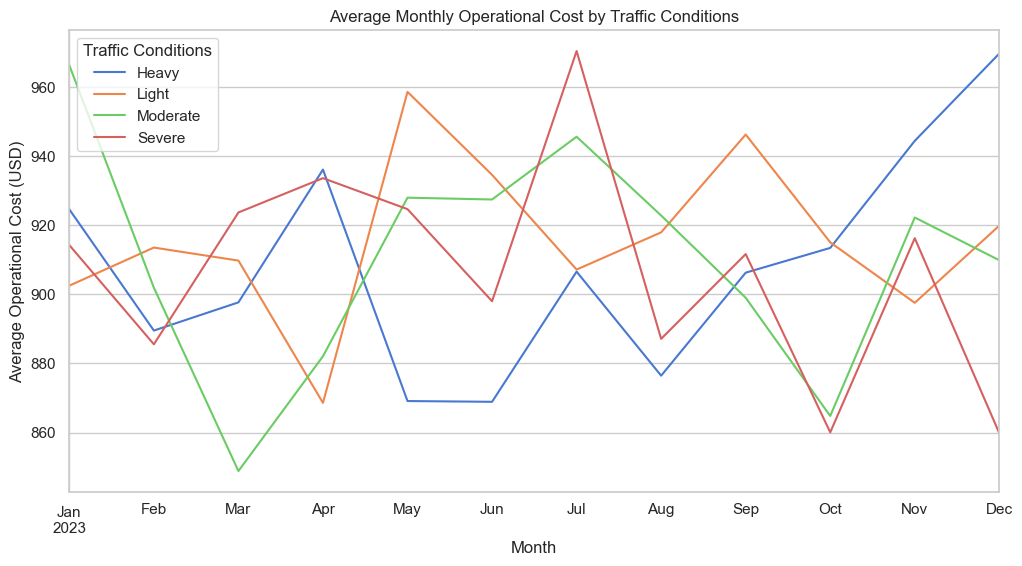

In [140]:
# Convert Date to datetime format if it isn't already
logistics_df['Date'] = pd.to_datetime(logistics_df['Date'])

# Aggregate by month and traffic conditions
monthly_data = logistics_df.groupby([logistics_df['Date'].dt.to_period("M"), 'Traffic Conditions'])['Total Operational Cost (USD)'].mean().unstack()

# Plot monthly average operational cost by traffic conditions
monthly_data.plot(kind='line', figsize=(12, 6))
plt.title("Average Monthly Operational Cost by Traffic Conditions")
plt.xlabel("Month")
plt.ylabel("Average Operational Cost (USD)")
plt.legend(title="Traffic Conditions")
plt.show()

Seasonal Analysis by Traffic Conditions

To visualize seasonal variations, I will categorize data by season and plot operational costs.

This stacked bar chart allows for easy comparison of costs by season and traffic conditions, highlighting high-cost periods.

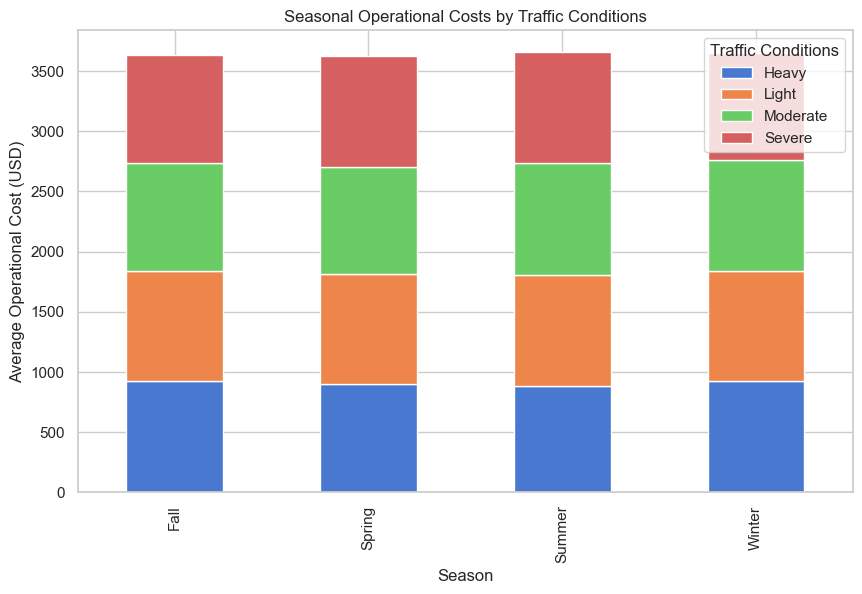

In [141]:
# Map months to seasons
season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
              7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
logistics_df['Season'] = logistics_df['Date'].dt.month.map(season_map)

# Aggregate by season and traffic conditions
seasonal_data = logistics_df.groupby(['Season', 'Traffic Conditions'])['Total Operational Cost (USD)'].mean().unstack()

# Plot seasonal operational costs by traffic conditions
seasonal_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Seasonal Operational Costs by Traffic Conditions")
plt.xlabel("Season")
plt.ylabel("Average Operational Cost (USD)")
plt.legend(title="Traffic Conditions")
plt.show()

---

## Time Series Visualizations (For Time-Dependent Data)

---

Line Plot

Purpose: Common for time series data to track changes over time.

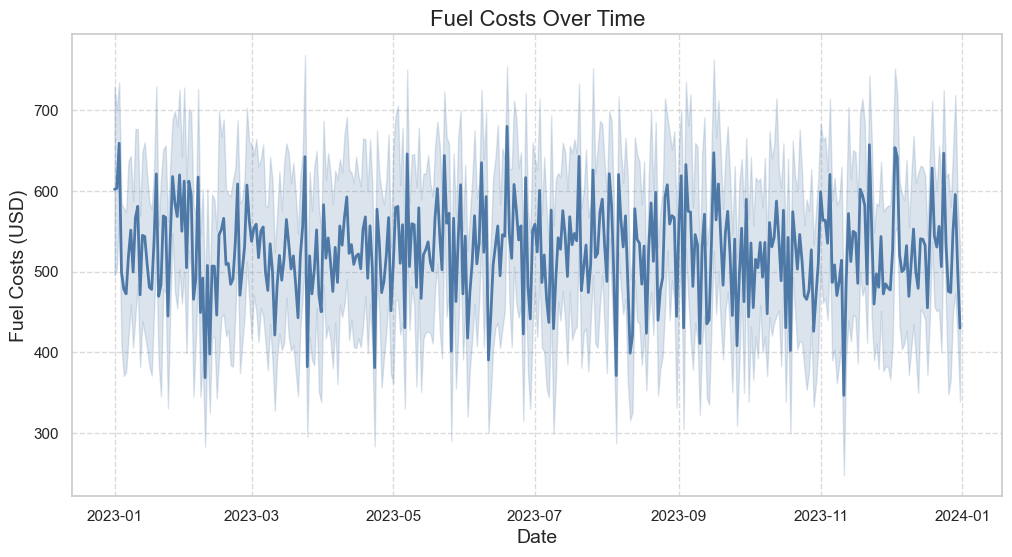

In [142]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Fuel Costs (USD)', data=df, color="#4e79a7", linewidth=2)
plt.title("Fuel Costs Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Fuel Costs (USD)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Seasonal Decomposition

Purpose: Decomposes time series data into trend, seasonality, and residuals.

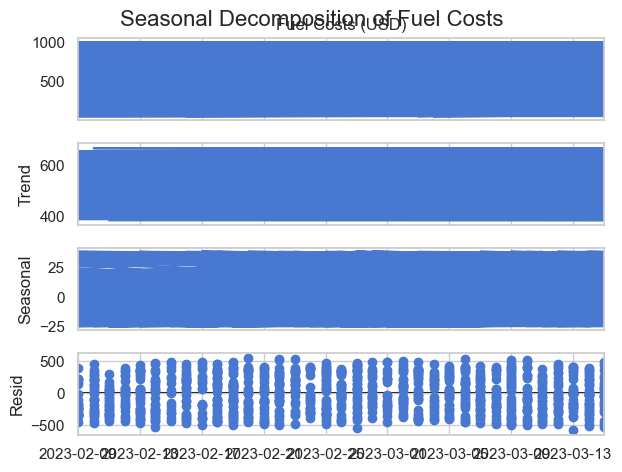

In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Date' column is the index in your DataFrame
df.set_index('Date', inplace=True)
result = seasonal_decompose(df['Fuel Costs (USD)'], model='additive', period=30)
result.plot()
plt.suptitle("Seasonal Decomposition of Fuel Costs", fontsize=16)
plt.show()

---

## Distribution and Anomaly Detection

---

Violin Plot

Purpose: Combines box plot and KDE plot, useful for visualizing distributions.

/var/folders/s_/bdr4_2yj4_z0cz37bq2yrzxh0000gn/T/ipykernel_66967/509003668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Traffic Conditions', y='Fuel Costs (USD)', data=df, palette="Set2", inner="quartile")


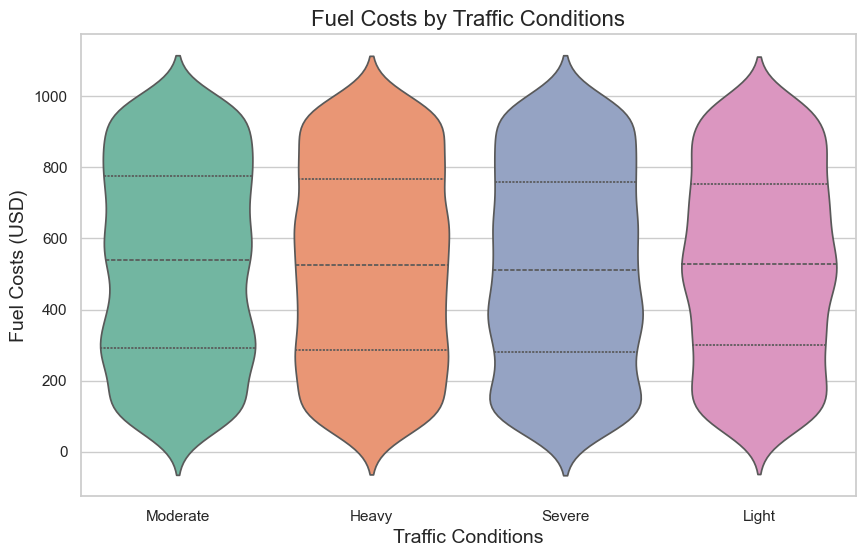

In [144]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Traffic Conditions', y='Fuel Costs (USD)', data=df, palette="Set2", inner="quartile")
plt.title("Fuel Costs by Traffic Conditions", fontsize=16)
plt.xlabel("Traffic Conditions", fontsize=14)
plt.ylabel("Fuel Costs (USD)", fontsize=14)
plt.show()

Z-score / IQR for Outlier Detection

Purpose: Identify and visualize outliers in numerical data.

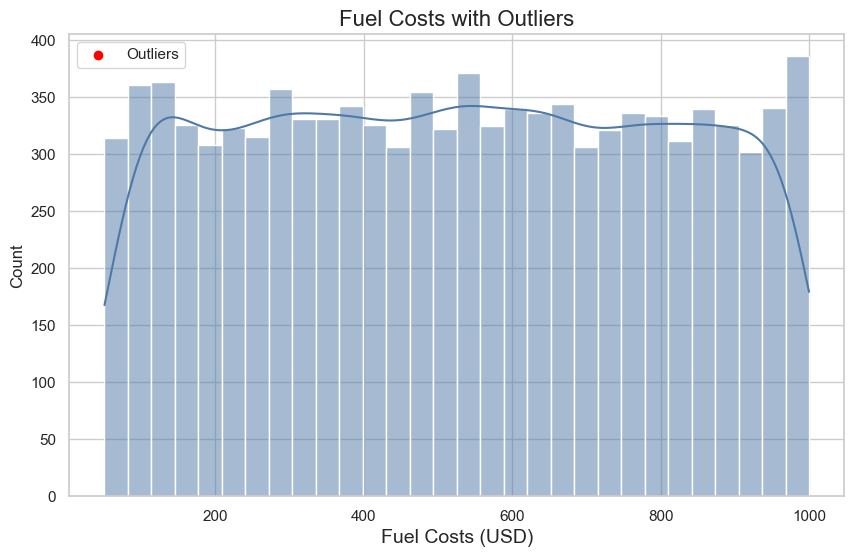

In [145]:
from scipy import stats

# Z-score method
df['z_score'] = stats.zscore(df['Fuel Costs (USD)'])
outliers = df[df['z_score'].abs() > 3]

plt.figure(figsize=(10, 6))
sns.histplot(df['Fuel Costs (USD)'], bins=30, kde=True, color="#4e79a7")
plt.scatter(outliers['Fuel Costs (USD)'], [0]*len(outliers), color='red', label='Outliers')
plt.title("Fuel Costs with Outliers", fontsize=16)
plt.xlabel("Fuel Costs (USD)", fontsize=14)
plt.legend()
plt.show()

Missing Value Heatmap

Purpose: Visualizes missing data across features.

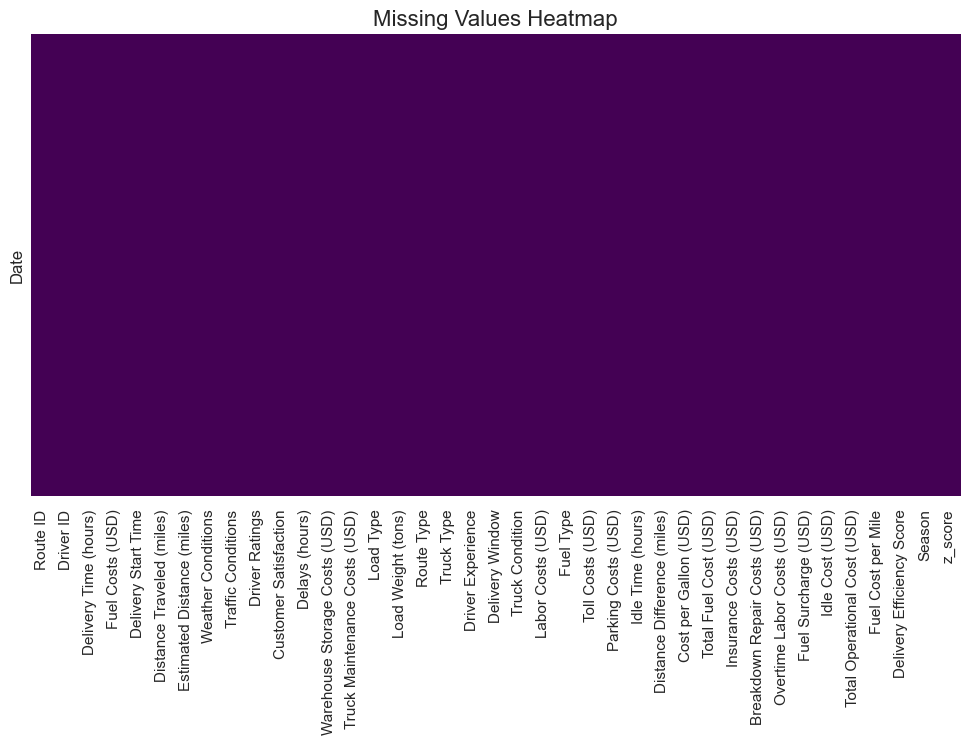

In [146]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=16)
plt.show()

---

# Clustering 

---

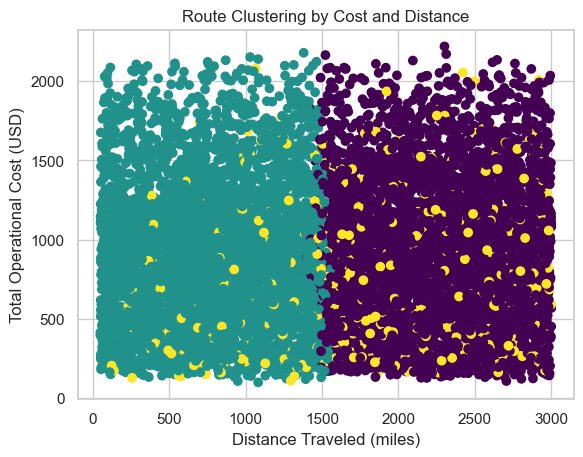

In [147]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
logistics_engineered_df = pd.read_csv('../data/processed/engineered_data.csv')
# Standardize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(logistics_engineered_df[['Distance Traveled (miles)', 'Total Operational Cost (USD)', 'Delivery Efficiency Score']])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
logistics_engineered_df['Route Cluster'] = kmeans.fit_predict(scaled_features)

# Plot clusters
plt.scatter(logistics_engineered_df['Distance Traveled (miles)'], logistics_engineered_df['Total Operational Cost (USD)'], 
            c=logistics_engineered_df['Route Cluster'], cmap='viridis')
plt.xlabel('Distance Traveled (miles)')
plt.ylabel('Total Operational Cost (USD)')
plt.title('Route Clustering by Cost and Distance')
plt.show()

K-Means Clustering

K-Means clustering identifies patterns, such as types of routes based on distance and delivery time. The cluster labels can later be used as features in modeling.


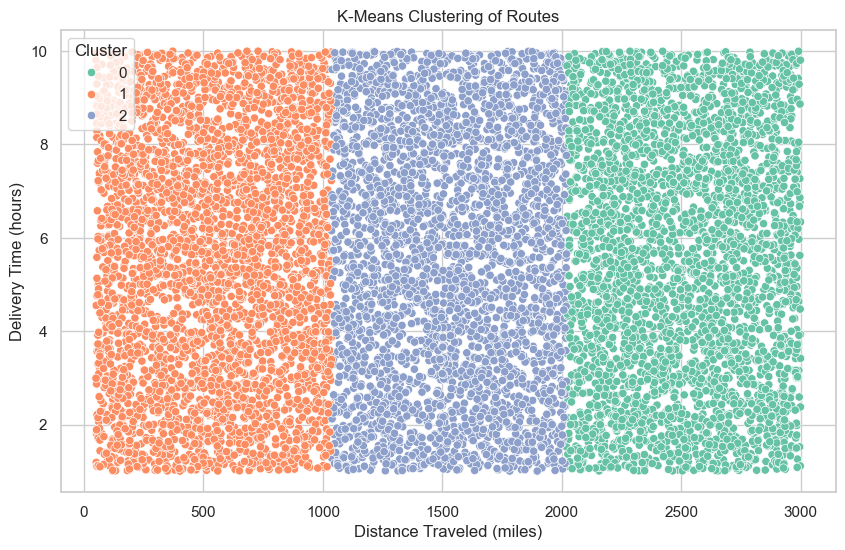

In [148]:
from sklearn.cluster import KMeans
import numpy as np

# Select features for clustering
features = df[['Distance Traveled (miles)', 'Delivery Time (hours)']]

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance Traveled (miles)', y='Delivery Time (hours)', hue='Cluster', data=df, palette="Set2")
plt.title("K-Means Clustering of Routes")
plt.show()

DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Purpose: Finds clusters based on the density of data points, useful for irregularly shaped clusters.

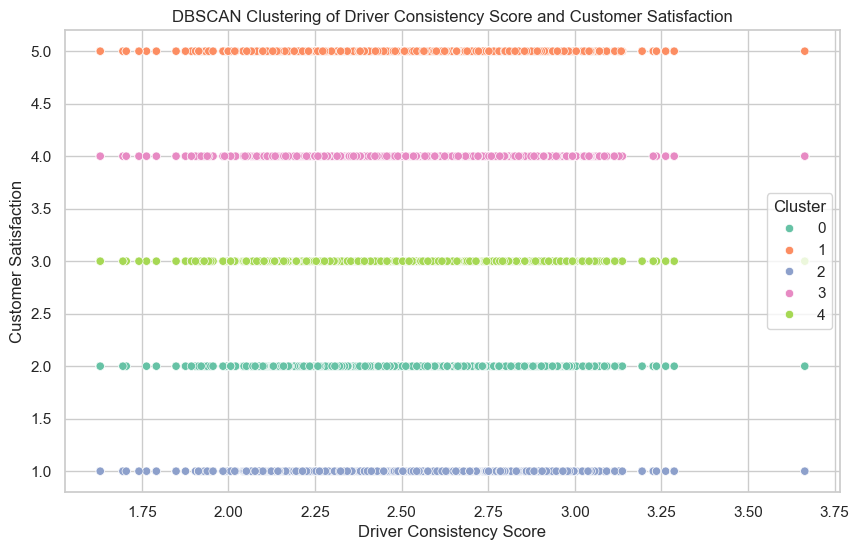

In [149]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
logistics_engineered_df['cluster'] = dbscan.fit_predict(logistics_engineered_df[['Driver Consistency Score', 'Customer Satisfaction']])

# Scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Driver Consistency Score', y='Customer Satisfaction', hue='cluster', data=logistics_engineered_df, palette="Set2")
plt.title("DBSCAN Clustering of Driver Consistency Score and Customer Satisfaction")
plt.xlabel("Driver Consistency Score")
plt.ylabel("Customer Satisfaction")
plt.legend(title="Cluster")
plt.show()

Hierarchical Clustering

Purpose: Builds a hierarchy of clusters that can be visualized using a dendrogram.

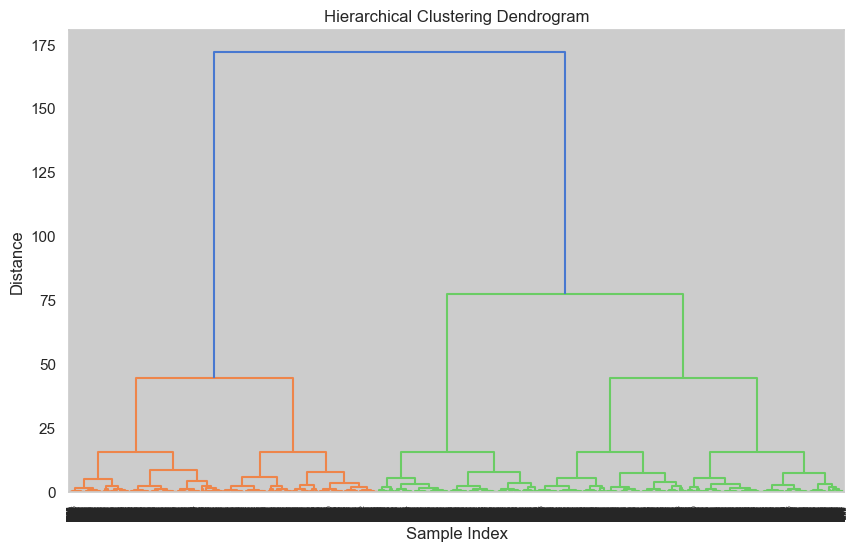

In [150]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Ensure the DataFrame has the columns
# Example using 'Driver Consistency Score' and 'Customer Satisfaction' for hierarchical clustering
data = logistics_engineered_df[['Driver Consistency Score', 'Customer Satisfaction']]
# Create the linkage matrix
linkage_matrix = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

---

Data Selection: data = df[['Driver Consistency Score', 'Customer Satisfaction']] extracts the relevant columns as a 2D array.

Linkage Matrix: linkage(data, method='ward') performs hierarchical clustering on the selected data.

Dendrogram: dendrogram(linkage_matrix) generates the dendrogram plot to visualize the clustering.

---

t-SNE and PCA for Dimensionality Reduction (Often used in conjunction with clustering)

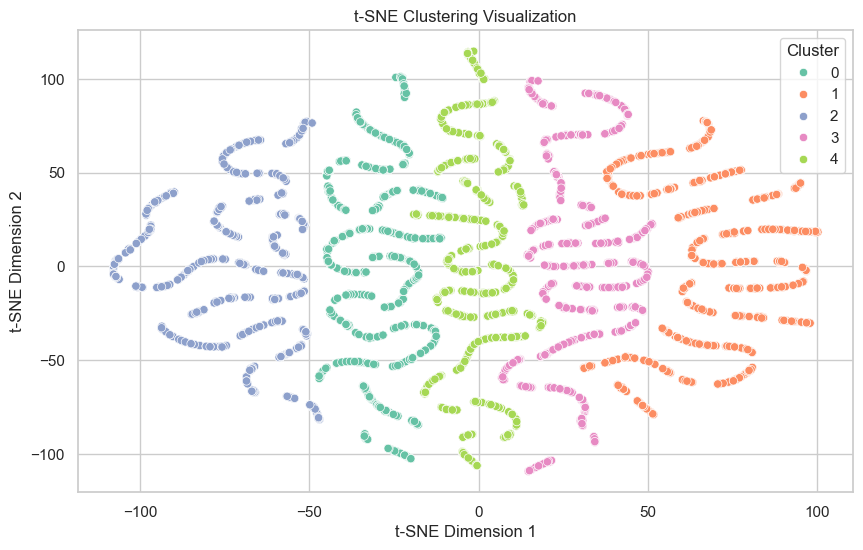

In [151]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(logistics_engineered_df[['Driver Consistency Score', 'Customer Satisfaction']])

# Add t-SNE results to the DataFrame
logistics_engineered_df['tsne-2d-one'] = tsne_results[:, 0]
logistics_engineered_df['tsne-2d-two'] = tsne_results[:, 1]

# Scatter plot for t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='cluster', data=logistics_engineered_df, palette="Set2")
plt.title("t-SNE Clustering Visualization")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.show()